In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [59]:
path = "data/asdf.csv"
df = pd.read_csv(path)

X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

Batch gradient descent

In [60]:
alpha = 0.0001
iterations = 100

Xb = (X - np.mean(X)) / np.std(X) # normalize (OPTIONAL), comment out this line and it still works
Xb = np.c_[np.ones_like(y), X] # append column of 1s (beware 1s can get normalized to 0)

theta = np.zeros_like(Xb[0])

for _ in range(iterations):
    predictions = Xb @ theta
    errors = predictions - y
    gradient = Xb.T @ errors
    theta = theta - (alpha / len(Xb)) * gradient

print(theta)

[0.01517786 1.02741671]


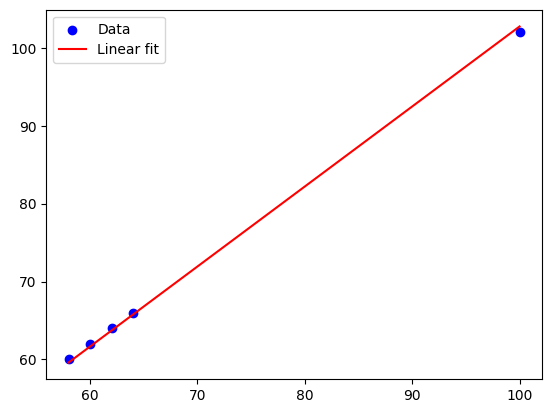

In [61]:
predictions = Xb @ theta

plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, predictions, color="red", label="Linear fit")
plt.legend()

Alternatively, to do stochastic gradient descent.

In [62]:
theta = np.ones_like(Xb[0])

for _ in range(iterations):
    for xi, yi in zip(Xb, y):
        prediction = xi @ theta
        error = prediction - yi
        gradient = xi * error
        theta = theta - (alpha / len(Xb)) * gradient

print(theta)

[1.00072157 1.01325007]


### Question 2

Logisitic regression

In [70]:
path = "data/data05_2.csv"
df = pd.read_csv(path)

X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

In [114]:
import math

@np.vectorize
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [115]:
alpha = 0.1
iterations = 1000

Xb = np.c_[np.ones_like(y), X]
theta = np.ones_like(Xb[0])

for _ in range(iterations):
    predictions = sigmoid(Xb @ theta) # literally the only line that differs
    errors = predictions - y
    gradient = Xb.T @ errors
    theta = theta - (alpha / len(Xb)) * gradient

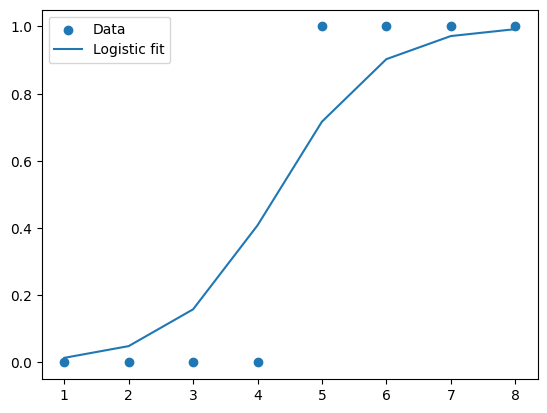

In [117]:
predictions = sigmoid(Xb @ theta)

plt.scatter(X, y, label="Data")
plt.plot(X, predictions, label="Logistic fit")
plt.legend()

### Question 3

`df['y'] = df['y'].apply(lambda x: 1 if x >= 0 else 0)`

Rest is the same as Q.